# **• DOMAIN: Healthcare**

# **• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions.University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.**

**• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.**
> **1. P_incidence**

> **2. P_tilt**

> **3. L_angle**

> **4. S_slope**

> **5. P_radius**

> **6. S_degree**

> **7. Class**

1. **pelvic_incidence-P_incidence**
2. **pelvic_tilt numeric-P_tilt**
3. **lumbar_lordosis_angle-L_angle**
4. **sacral_slope-S_slope**
5. **pelvic_radius-P_radius**
6. **degree_spondylolisthesis-S_degree**
7. **class**

# Importing Necessary Packages

In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [4]:
os.chdir('C:\\Users\\VGopalak\\Desktop\\ML\\Supervised Learning Project')

# 1. Import and warehouse data:

**Dataset 1**

In [5]:
df1=pd.read_csv('Part1 - Normal.csv')

**Checking First 5 Rows**

In [6]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


**Shape of the dataset**

In [7]:
df1.shape

(100, 7)

**We have 7 columns and 100 rows**

**Dataset-2**

In [8]:
df2=pd.read_csv('Part1 - Type_H.csv')

**Shape of the dataset**

In [9]:
df2.shape

(60, 7)

**Checking First 5 Rows**

In [10]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


**Shape of the dataset**

In [11]:
df2.shape

(60, 7)

**We have 7 columns and 60 rows**

**Dataset-3**

In [12]:
df3=pd.read_csv('Part1 - Type_S.csv')

**Checking First 5 Rows**

In [13]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


**Shape of the dataset**

In [14]:
df3.shape

(150, 7)

**We have 7 columns and 150 rows**

**Final Dataframe**

In [15]:
df=df1.append([df2,df3])

**Shape of the dataset**

In [16]:
df.shape

(310, 7)

**Final Dataset have 7 columns and 310 rows**

# 2. Data cleansing:

**Information about the data**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


**Checking Datatypes**

In [18]:
df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

**There is no junk values in the dataset**

**Class is object we need to change the datatype of this column**

**Missing Value Check**

In [19]:
df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

**There is no missing value in the dataset**

**Target Variable:**

In [20]:
df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

**Here tp_s and Type_S, Normal and Nrmal,Type_H and type_ h represents same class.**

In [21]:
df.loc[df['Class']=='tp_s','Class']='Type_S'
df.loc[df['Class']=='Nrmal','Class']='Normal'
df.loc[df['Class']=='type_h','Class']='Type_H'

In [22]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [23]:
df['Class']=df['Class'].astype('category') #changing to category datatype

In [24]:
df['Class'].nunique()

3

**Here we have three different class in our dataset**

# 3.Data Analysis & Visulaization

**5 Point Summary**

In [25]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**P_incidence:**

>  **Mean and Median are nearly equal .**

> **Distribution might be normal. we have 75 % of values are less than 72 but maxiumum value is 129**

**P_tilt:**

> **Mean and median are nearly equal.**

> **Distribution might be normal.**

> **It contains negative values**

> **75 % of values are less than 22 but maximum value is 49 so there might be little right skewness**

**L_angle:**

> **Mean and Median are nearly equal. There is no  deviation.**

> **Distribution might be normal**

> **There might be few outliers because of the maximum value**

**S_slope:**

> **Mean and Median are nearly equal.**

> **Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.**

**P_radius:**

> **Distribution might be normal.**

> **There is no much Deviation.**

**S_Degree:**

> **Mean is greater than Median so there might be right skewness in the data .**

> **We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.**



# **Univariate Analysis**

**Distribution and outlier analysis of numerical variables**

**P_incidence**

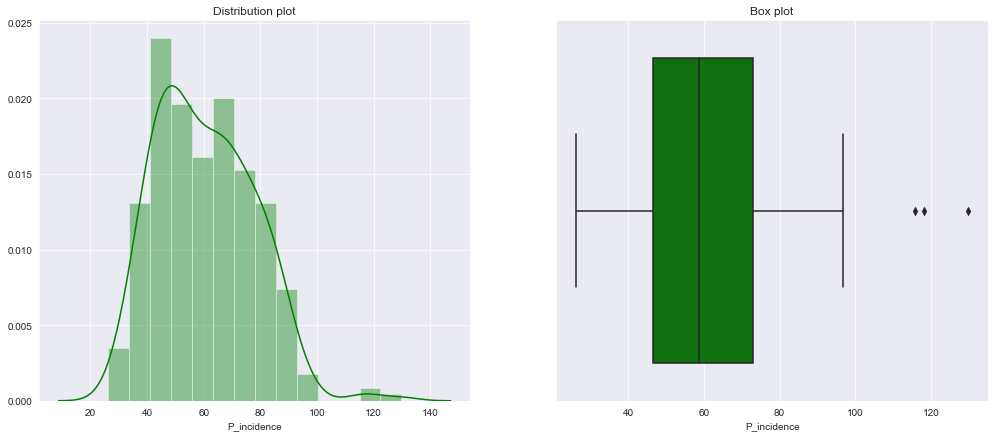

 Total Number of outliers in P_incidence: 3


In [26]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_incidence', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_incidence'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_incidence'],25),np.percentile(df['P_incidence'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_incidence'] if i < lower or i > upper]
print('{} Total Number of outliers in P_incidence: {}'.format('\033[1m',len(Outliers)))

> **Normality is maintained with very less extreme values**

> **We can see three outliers exists in the column**

**P_tilt**

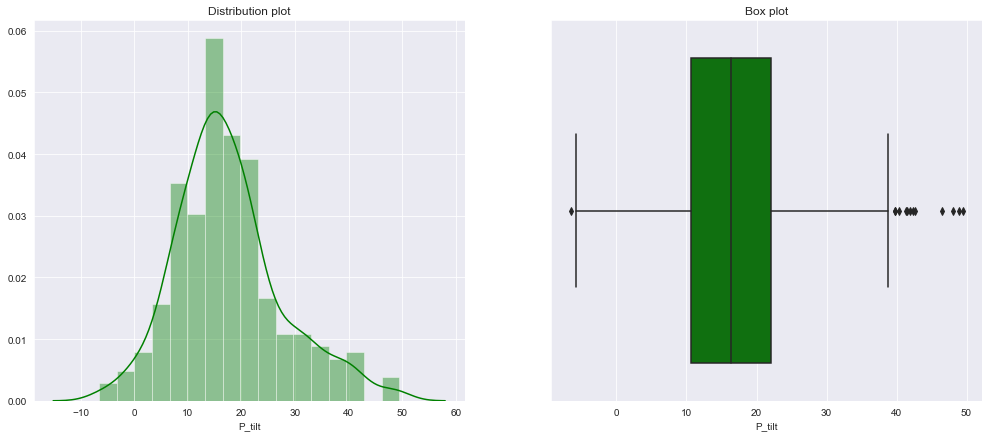

 Total Number of outliers in P_tilt: 13


In [27]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_tilt', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_tilt'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_tilt'],25),np.percentile(df['P_tilt'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_tilt'] if i < lower or i > upper]
print('{} Total Number of outliers in P_tilt: {}'.format('\033[1m',len(Outliers)))

> **Data is Normally distributed and we can see one peakness in the center**

> **It is has little skewness towards right side**

> **We can see one outlier in negative end and few outliers in positive end.**

**L_angle**

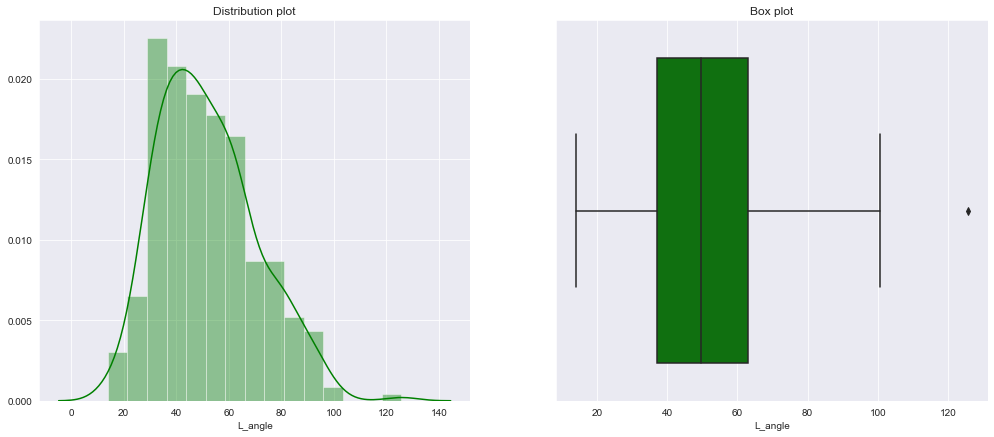

 Total Number of outliers in L_angle: 1


In [28]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'L_angle', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['L_angle'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['L_angle'],25),np.percentile(df['L_angle'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['L_angle'] if i < lower or i > upper]
print('{} Total Number of outliers in L_angle: {}'.format('\033[1m',len(Outliers)))

> **It is Normally distributed**

> **Little right skewness because of one outlier**

**S_slope**

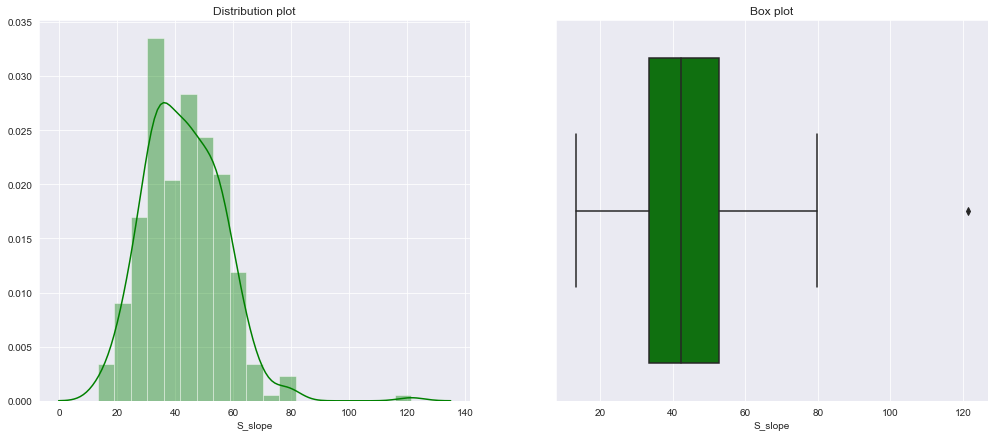

 Total Number of outliers in S_slope: 1


In [29]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_slope', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['S_slope'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['S_slope'],25),np.percentile(df['S_slope'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['S_slope'] if i < lower or i > upper]
print('{} Total Number of outliers in S_slope: {}'.format('\033[1m',len(Outliers)))

> **There is right skewness due to one outlier**

**P_radius**

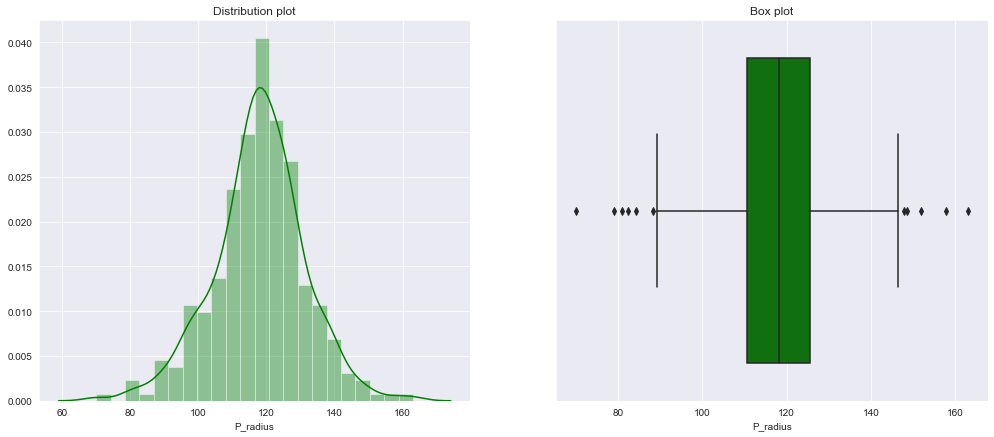

 Total Number of outliers in P_radius: 11


In [30]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_radius', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['P_radius'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['P_radius'],25),np.percentile(df['P_radius'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['P_radius'] if i < lower or i > upper]
print('{} Total Number of outliers in P_radius: {}'.format('\033[1m',len(Outliers)))

> **Data is normally distributed**

> **We can see outliers at both the ends.**

**S_Degree**

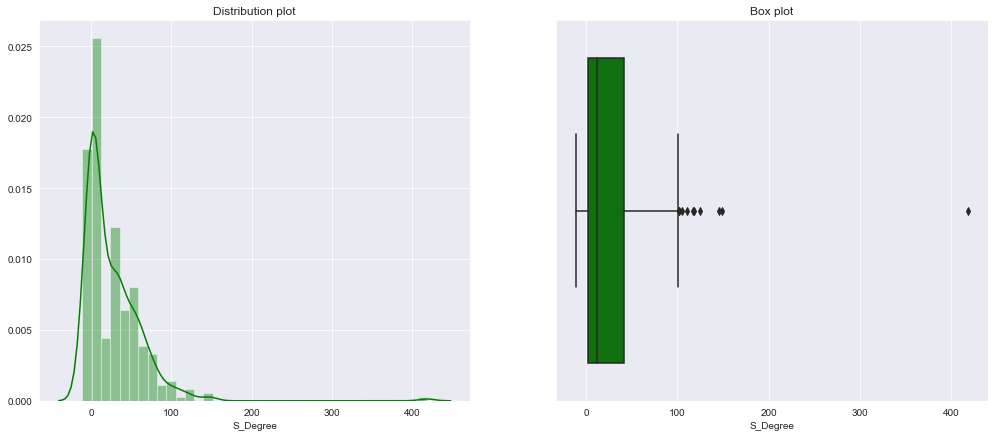

 Total Number of outliers in S_Degree: 10


In [31]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_Degree', data=df,  orient='h' , ax=axes[1],color='Green')
sns.distplot(df['S_Degree'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(df['S_Degree'],25),np.percentile(df['S_Degree'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in df['S_Degree'] if i < lower or i > upper]
print('{} Total Number of outliers in S_Degree: {}'.format('\033[1m',len(Outliers)))

> **There is Positive Skewness in the data**

> **Hugely affected by Outliers**

**Distribution of Target Variable**

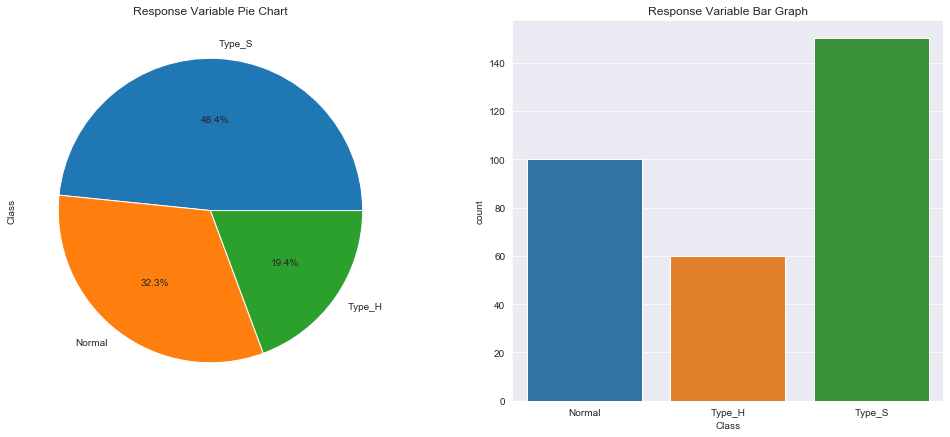

In [32]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=df,ax=axes[1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

**Type_S variable has 48.4% of total values followed by Normal and Type_H**

 # **Bi Variate Analysis**

**Class vs P_incidence**

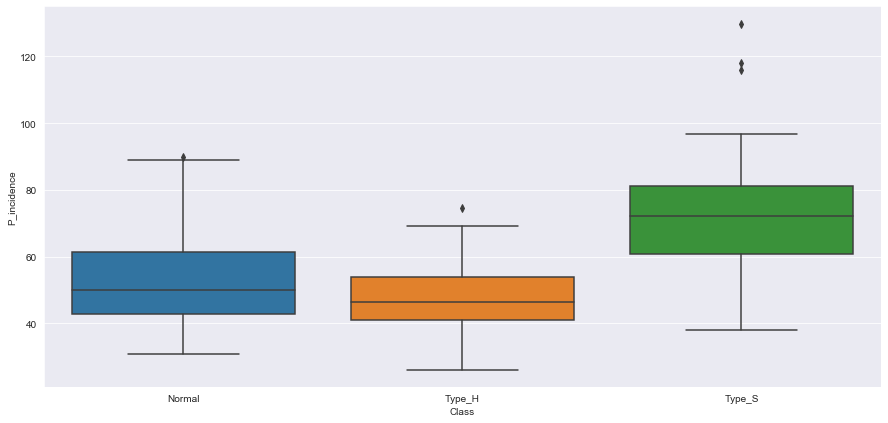

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_incidence', data= df)
plt.show()

> **P_Incidence Value is larger for Type_S Class. We can see some extreme values as well**

> **Normal Value is slightly higher than Type_H**

**Class vs P_tilt**

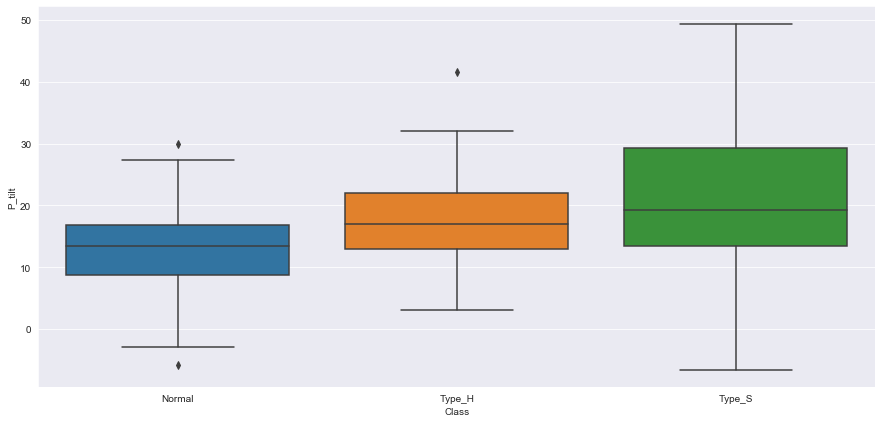

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_tilt', data= df)
plt.show()

> **Mean of Type_S is slightly higher than rest two**

> **Few cases Normal and Type_H also has huge values**

**Class vs L_angle**

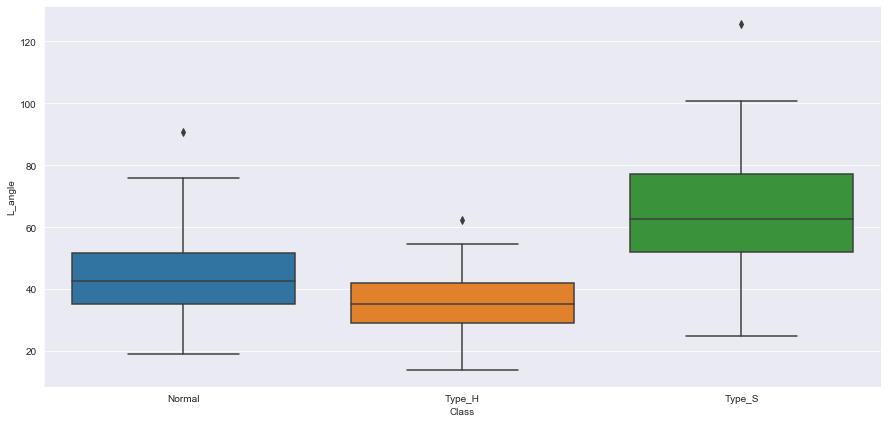

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='L_angle', data= df)
plt.show()

> **L_Angle has higher value for Type_S Class**

>**We can see Normal class has higher values compared to type_H class**

> **Each class contains one outlier**

**Class vs S_slope**

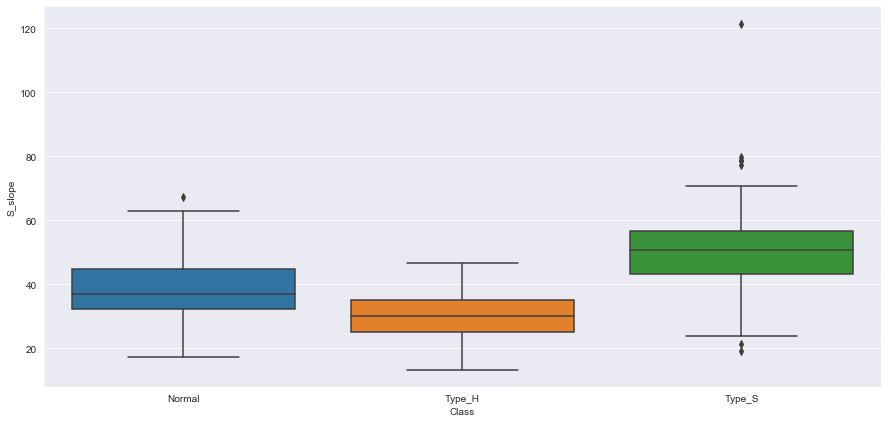

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_slope', data= df)
plt.show()

> **S_slope has huge values for Type_S class**

>**Normal class has high s_slope compared to Type_H**

**Class vs P_radius**

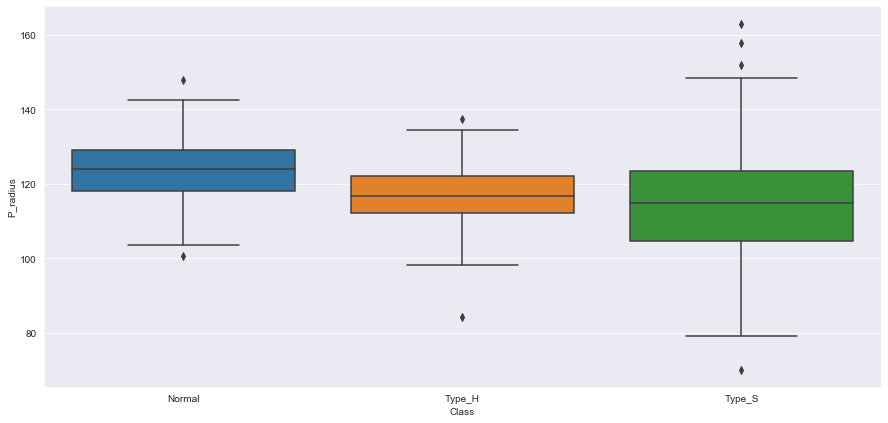

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='P_radius', data= df)
plt.show()

> **We can see P_radius value is more for Normal Class**

> **There is some extreme values for Type_s class**

> **All classes has higher and lower Value**

**Class vs S_Degree**

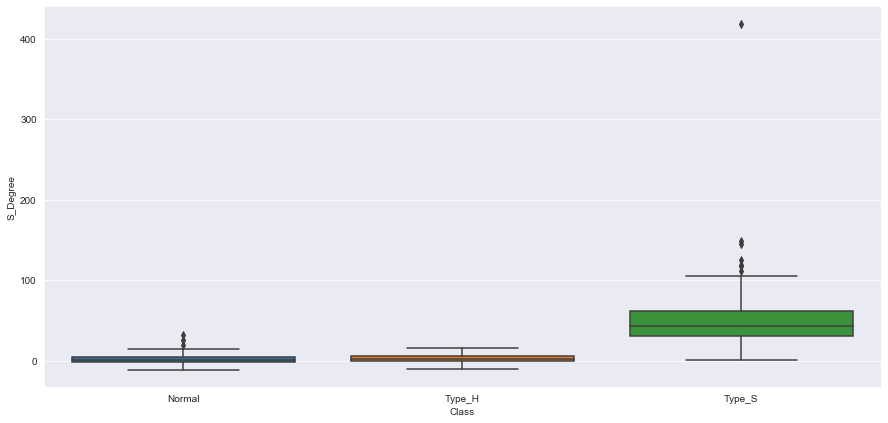

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Class', y='S_Degree', data= df)
plt.show()

> **S_Degree has extreme values for type_S Class**

>**Few Normal class also has huge values for S_Degree**

# **Multivariate Analysis**

In [39]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

**Pair Plot of independent Variables**

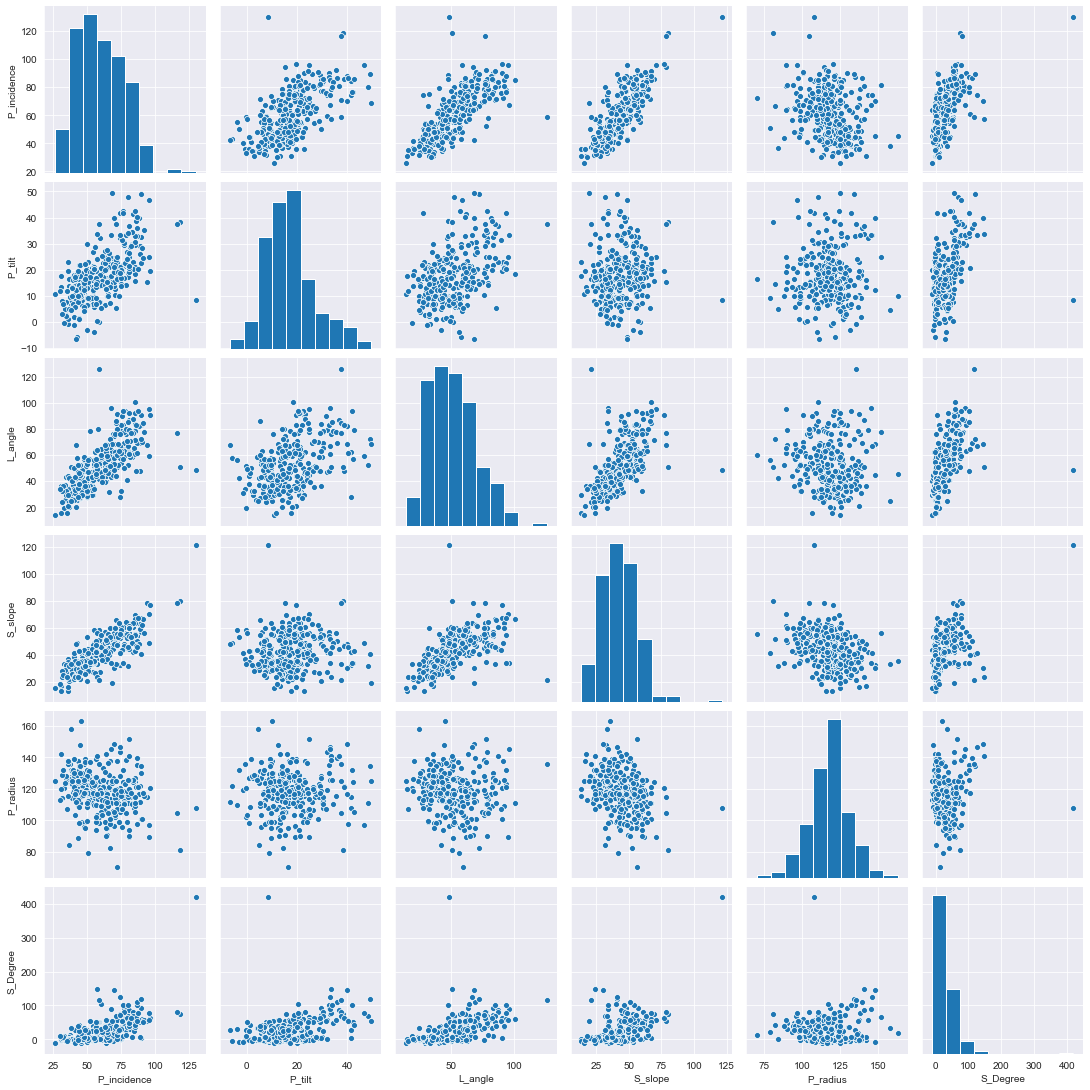

In [40]:
sns.pairplot(df)
plt.show()

> **Along the diagonal we can see the distribution of individual variable**

> **P_incidence has  postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle**

> **P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius**

> **L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius**

> **s_slope has positive Relationship with L_angle and s_degree**

> **p_radius has no Relationship with s_degree,p_tilt,l_angle.**

> **S_degree has no strong positive Relationship with any of the variables.**

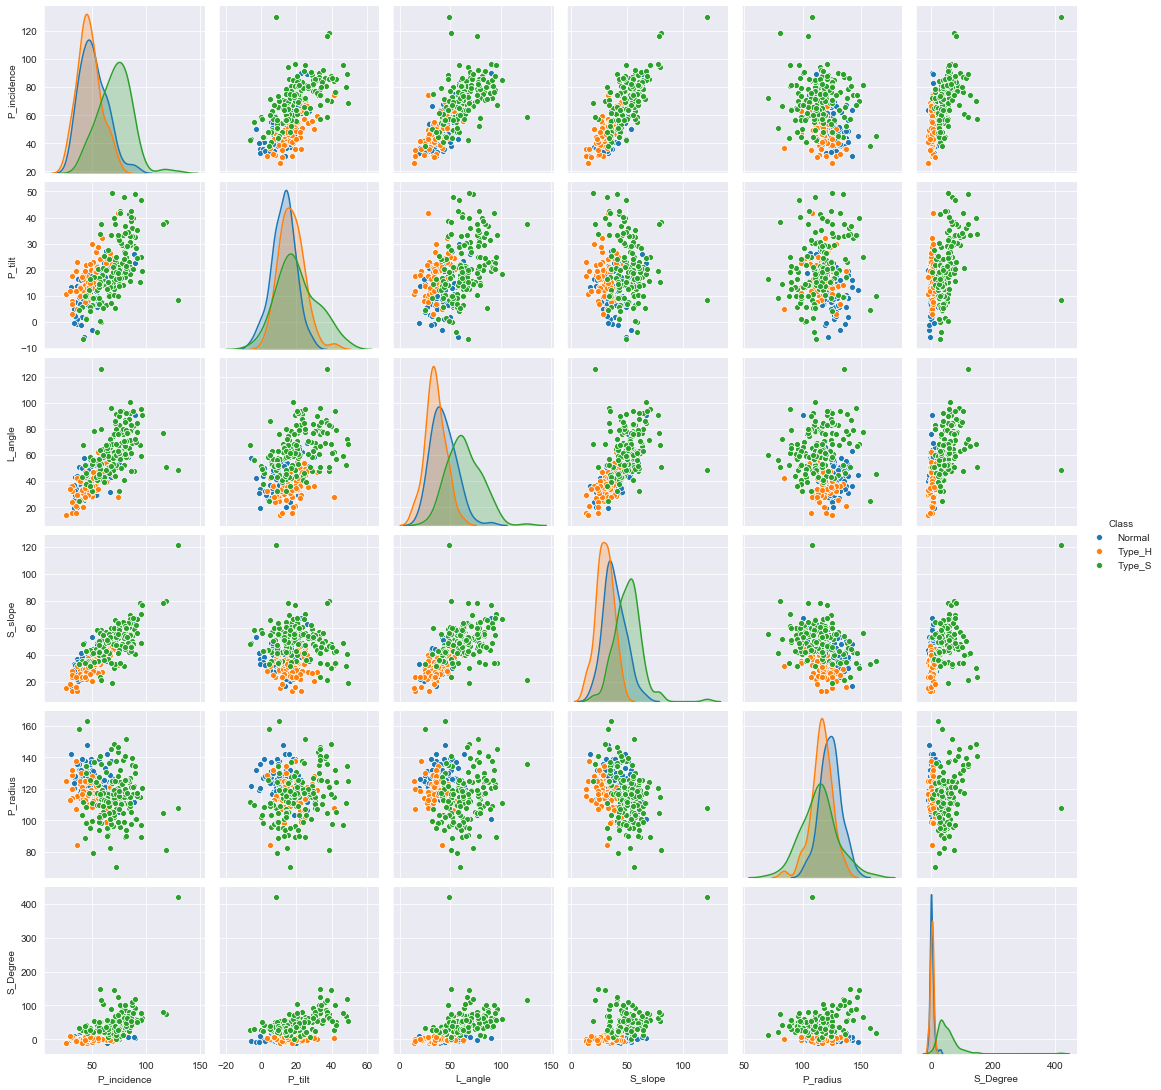

In [41]:
sns.pairplot(df,hue='Class')

> **Along the diagonal we can see distribution of variable for three claases are not same.We can prove that statistically as well**

> **It is evident that type_s class is more compared to other two**

> **Normal class has higher values compared to Type_H**

In [42]:
class_summary=df.groupby('Class') #getting mean values of each class for all independent variables
class_summary.mean().reset_index()

,Class,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
1,Type_H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
2,Type_S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


**It is clear that s_Degree of Type_S contains larger values.**


# **Hypotesis Testing**

# Is the distribution of independent variables across normal,type_H and type_s, the same?

**Here we are using one-way anova to do statistical test.**

In [43]:
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in col:
    print('{} Ho: Class types does not affect the {}'.format('\033[1m',i))
    print('\n')
    print('{} H1: Class types affect the {}'.format('\033[1m',i))
    print('\n')
    df_normal=df[df.Class=='Normal'][i]
    df_typeH=df[df.Class=='Type_H'][i]
    df_typeS=df[df.Class=='Type_S'][i]
    f_stats,p_value=stats.f_oneway(df_normal,df_typeH,df_typeS)
    print('{} F_stats: {}'.format('\033[1m',f_stats))
    print('{} p_value: {}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Class types has efect on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Class types has no effect on {}'.format('\033[1m',i))
    print('\n')

 Ho: Class types does not affect the P_incidence


 H1: Class types affect the P_incidence


 F_stats: 98.53970917437489
 p_value: 8.752848964938295e-34
 Rejecting Null Hypothesis.Class types has efect on P_incidence


 Ho: Class types does not affect the P_tilt


 H1: Class types affect the P_tilt


 F_stats: 21.29919432898912
 p_value: 2.176879152985521e-09
 Rejecting Null Hypothesis.Class types has efect on P_tilt


 Ho: Class types does not affect the L_angle


 H1: Class types affect the L_angle


 F_stats: 114.98284047330316
 p_value: 5.357329394004833e-38
 Rejecting Null Hypothesis.Class types has efect on L_angle


 Ho: Class types does not affect the S_slope


 H1: Class types affect the S_slope


 F_stats: 89.64395329777523
 p_value: 2.175670364983569e-31
 Rejecting Null Hypothesis.Class types has efect on S_slope


 Ho: Class types does not affect the P_radius


 H1: Class types affect the P_radius


 F_stats: 16.86693475538487
 p_value: 1.1219959042394205e-07
 Rejecting Nul

**We can see class type affects each and every independent variables**

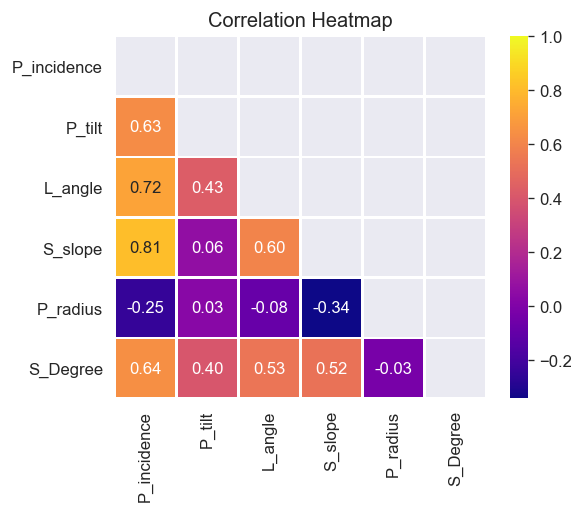

In [44]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

**Correlation between s_degree and p_incidence have high correlation.**

**S_degree and p_radius has negative correlation**

# 4. Data Pre-processing

# **Outlier Analysis**

**As we have seen in our EDA we have very less outliers which needs to be handled**

**We are imputing outiers with mean**

In [45]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3


 Mean of P_incidence is 59


 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13


 Mean of P_tilt is 16


 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1


 Mean of L_angle is 51


 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1


 Mean of S_slope is 42


 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11


 Mean of P_radius is 118


 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10


 Mean of S_Degree is 22


 Total Number of outliers in S_Degree After Imputing : 0




> **We have imputed all outliers with mean value**

# **Encoding Target Variable**

In [46]:
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

**Normal: 0**

**Type_H: 1**

**Type_S: 2**

In [47]:
df['Class']=df['Class'].astype('category') #changing datatype to category.

# **Checking on Target Imbalance**

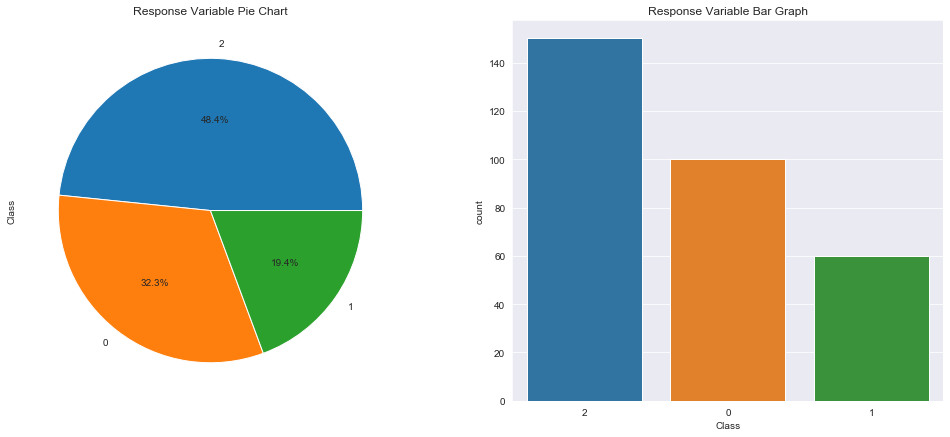

In [51]:
f,axes=plt.subplots(1,2,figsize=(17,7))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=df,ax=axes[1],order=[2,0,1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

**We have imbalanced target variable**

**Every class is not equally distributed.**

**48% of data is occupied by Type_S**

**When you have imbalance dataset model does not learn about less distributed classes. This gives
poor performance in unseen data**

# Train - Test Split

In [52]:
# Arrange data into independent variables and dependent variables
X=df.drop(columns='Class')
y=df['Class'] #target

In [53]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,59.893743,16.548519,51.689825,42.697607,118.061242,22.193516
std,16.139975,8.404101,18.071145,12.656481,11.342178,25.230932
min,26.147921,-5.845994,14.000000,13.366931,89.307547,-11.058179
25%,46.430294,10.705427,37.000000,33.347122,111.295804,1.603727
50%,58.691038,16.000000,49.562398,42.349084,118.000000,11.767934
75%,72.313279,21.021167,62.964777,52.475365,125.196027,38.144544
max,96.657315,38.750670,100.744220,79.695154,146.466001,100.292107


# **Scaling Independent Variables**

In [54]:
X_Scaled=X.apply(zscore)

In [55]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-6.159947e-17,1.001617,-2.094203,-0.835517,-0.074638,0.770733,2.281479
P_tilt,310.0,5.241663e-17,1.001617,-2.669021,-0.696391,-0.065374,0.533059,2.646095
L_angle,310.0,1.876635e-16,1.001617,-2.089008,-0.814203,-0.117915,0.624929,2.718904
S_slope,310.0,-2.438909e-16,1.001617,-2.321190,-0.739985,-0.027582,0.773799,2.927936
P_radius,310.0,-8.022257e-16,1.001617,-2.539211,-0.597449,-0.005408,0.630066,2.508397
S_Degree,310.0,-1.130816e-16,1.001617,-1.320025,-0.817373,-0.413874,0.633223,3.100356


> **We have scaled independent variables to corresponding z-score.**

> **We can see Mean becomes close to zero and Standard Deviation becomes 1**

In [56]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

# 5. Model training, testing and tuning

# **KNN Classifier**

**Basic Model**

In [57]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' ) #Building knn with 5 neighbors

In [58]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

# Classification Accuracy

In [59]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8986175115207373
Accuracy on Test data: 0.7741935483870968


> **Training Acuracy is 0.89 and Testing Accuracy is 0.77. Performance is less in test data.**

> **This is due to overfitting of data**

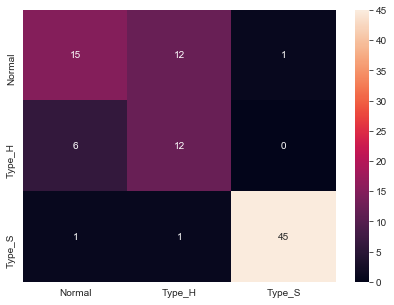

In [64]:
cm = confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

> **Our model predicts Type_S correctly most of the time. Only two misclassification on this class**

> **Misclassification of labels are more when predicting normal class**

# Classification Report

In [60]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.48      0.67      0.56        18
           2       0.98      0.96      0.97        47

    accuracy                           0.77        93
   macro avg       0.71      0.72      0.71        93
weighted avg       0.79      0.77      0.78        93



> **Precision for Normal class: It tells,out of all predicted normal class what fraction are predicted correctly**

> **Recall(sensitivity or TPR) for Normal class: Out of all actual Normal class how much fraction we identified correctly**

> **class 0 predicted correctly for 68% of time. similary for class 1 48% and class 2 98%**

> **By F1 score we can say that precison and recall is balanced for class 0 by 60% and for class 1 by 56 %**

> **We have maximum F1 score for class 2.**

# **Finding best K value**

In [65]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

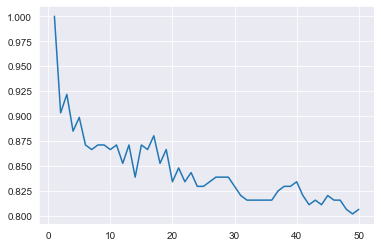

In [66]:
plt.plot(range(1,51),train_score)
plt.show()

> **Here training accuracy decreases when increase k value**

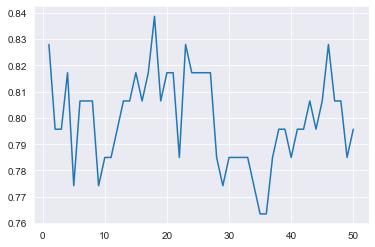

In [67]:
plt.plot(range(1,51),test_score)
plt.show()

> **The maximum accuracy occures when k is less than 20.**

> **We will fix k value as less than 20.**

In [68]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8279569892473119:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.58      0.78      0.67        18
           2       0.98      0.96      0.97        47

    accuracy                           0.83        93
   macro avg       0.78      0.79      0.78        93
weighted avg       0.84      0.83      0.83        93

Accuracy on Training data for k 3 is 0.9216589861751152:
Accuracy on Test data for k 3 is 0.7956989247311828:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.73      0.57      0.64        28
           1       0.54      0.78      0.64        18
           2       0.98      0.94      0.96        47

    accuracy                           0.80        93
   macro avg       0.75      0.76      0.74        93
weighted avg       0.82      0.80     

> **For K=13 we have balanced train and test error**

> **we can use k value as 13 because when we increase this value the precision becomes100% for class 2**

# K-Fold CV for finding best model

In [74]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.729032 (0.229554)
KNN: 0.738710 (0.242880)
NB: 0.770968 (0.209280)
SVM-linear: 0.800000 (0.187430)
SVM-poly: 0.748387 (0.220585)
SVM-rbf: 0.483871 (0.486017)


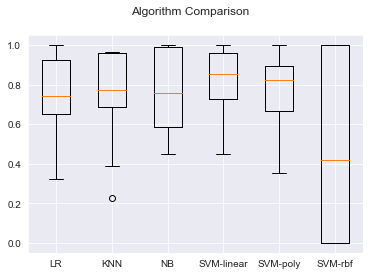

In [75]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

> **Accuracy is more for Naive bayes and svm-linear. However the standard deviation is less for svm-linear model.**

> **We can tell NB and svm-linear be a better algorithm for this dataset because of high accuracy and less Standard deviation**

**We will check with scaled values to see whether there is improvement in model**

LR: 0.812903 (0.177155)
KNN: 0.703226 (0.237398)
NB: 0.770968 (0.209280)
SVM-linear: 0.793548 (0.209156)
SVM-poly: 0.483871 (0.486017)
SVM-rbf: 0.483871 (0.486017)


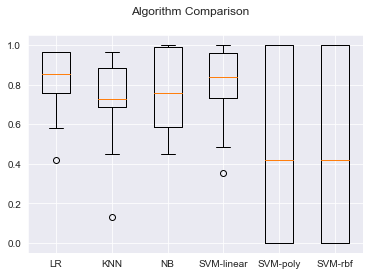

In [76]:
seed = 7
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model,X_Scaled,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**When the scaled values are used instead of normal values Logistic regression is performing well.**

**Logistic Regression gives 81% accuracy with little standard deviation.**

# **6.Conclusion and improvisation:**

> **All the variables has significant effect on target class**

> **class belongs to type_s has higher mean value for alomst all variables**

> **Class belongs to normal has lower values for all variables**

> **For almost all variables the distribution is normal**

> **For Knn, k=13 we are getting balanced train and test error**

> **We can use KNN as a final model because of balanced train and test error also the recall and precision values are good**

> **Clear description on each variables may help to understand problem statement better because of medical domain**